<a href="https://colab.research.google.com/github/itsmeyessir/CCDEPLRL_EXERCISES_COM222ML/blob/main/Exercise%20%236.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
import numpy as np
import pandas as pd

path = "https://github.com/robitussin/CCDEPLRL_EXERCISES/blob/9b8ac1c5683abecc144f0af47eb7cda0688e12b7/dataset/reviews.json?raw=true"

dataset = pd.read_json(path)

In [3]:
dataset.head()

,review,rating
0,sir okay armygreen shorts nice,5
1,di pareha yong mga size nila may sobrang liit ...,5
2,super worth it ang ganda Sombra grabi order na...,5
3,ganda po salamat,5
4,maayos pagkadeliver maganda den sya,5


## 1. Tokenize the data

In [87]:
review = dataset['review'].tolist()
rating = dataset['rating'].tolist()

# Convert ratings to binary labels: 4 and 5 => 1 (positive), 1 to 3 => 0 (negative/neutral)
binary_labels = [1 if r >= 4 else 0 for r in rating]

# Separate out the sentences and labels into training and test sets
training_size = int(len(review) * 0.8)

training_sentences = review[0:training_size]
testing_sentences = review[training_size:]
training_labels = binary_labels[0:training_size]
testing_labels = binary_labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [88]:
# answer here
vocab_size = 5000
embedding_dim = 32
max_length = 50
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

## 2. Sequence the data

In [89]:
# answer here
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

## 3. Pad the data

In [91]:
# answer here
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(tokenizer.word_index)  # Shows mapping like {'the': 1, 'movie': 2, ...}

# See the first training sentence as text
print("Original sentence:", training_sentences[0])

# See the sequence of word indices
print("Sequenced:", training_sequences[0])

# See the padded version of the sequence
print("Padded:", training_padded[0])

{'<OOV>': 1, 'the': 2, 'na': 3, 'i': 4, 'ko': 5, 'sa': 6, 'yung': 7, 'and': 8, 'ang': 9, 'ng': 10, 'it': 11, 'lang': 12, 'is': 13, 'at': 14, 'you': 15, 'seller': 16, 'naman': 17, 'to': 18, 'for': 19, 'not': 20, 'po': 21, 'sya': 22, 'maganda': 23, 'order': 24, 'pa': 25, 'but': 26, 'thank': 27, 'pero': 28, 'a': 29, 'good': 30, 'item': 31, 'product': 32, 'hindi': 33, 'so': 34, 'sana': 35, 'my': 36, 'ung': 37, 'dumating': 38, 'this': 39, 'ok': 40, 'delivery': 41, 'di': 42, 'was': 43, 'din': 44, 'its': 45, 'may': 46, 'quality': 47, 'in': 48, 'color': 49, 'price': 50, 'working': 51, 'very': 52, 'of': 53, 'ako': 54, 'ganda': 55, 'that': 56, 'me': 57, 'lng': 58, 'well': 59, 'buy': 60, 'with': 61, 'size': 62, 'mga': 63, 'fast': 64, 'as': 65, 'nice': 66, 'nyo': 67, 'will': 68, 'time': 69, 'nya': 70, 'siya': 71, '1': 72, 'black': 73, 'just': 74, 'items': 75, 'lazada': 76, 'thanks': 77, 'kasi': 78, 'are': 79, 'okay': 80, 'much': 81, 'kaso': 82, 'nmn': 83, 'on': 84, 'kaya': 85, '2': 86, 'kung': 87,

## 4. Train a sentiment model

In [92]:
# answer here
# Updated model with dropout
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_5      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [93]:
num_epochs = 30
history = model.fit(
    training_padded, training_labels_final,
    epochs=num_epochs,
    validation_data=(testing_padded, testing_labels_final)
)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5337 - loss: 0.6919 - val_accuracy: 0.2139 - val_loss: 0.7257
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5476 - loss: 0.6872 - val_accuracy: 0.2239 - val_loss: 0.7416
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5751 - loss: 0.6811 - val_accuracy: 0.2239 - val_loss: 0.7501
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5976 - loss: 0.6750 - val_accuracy: 0.2537 - val_loss: 0.7302
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6073 - loss: 0.6673 - val_accuracy: 0.2637 - val_loss: 0.7695
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6617 - loss: 0.6546 - val_accuracy: 0.2886 - val_loss: 0.7458
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6415 - loss: 0.6423 - val_accuracy: 0.3831 - val_loss: 0.7063
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7559 - loss: 0.6084 - val_accuracy: 0.7861 - val_loss

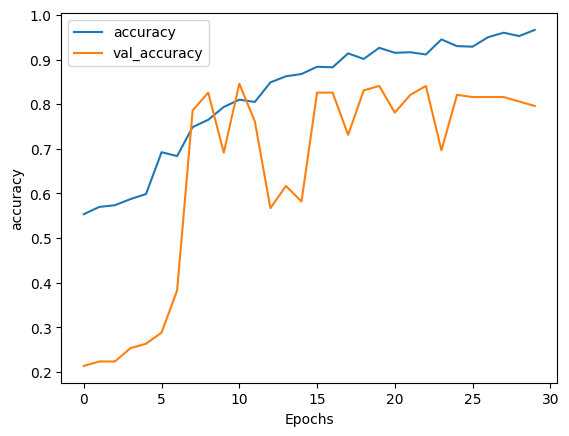

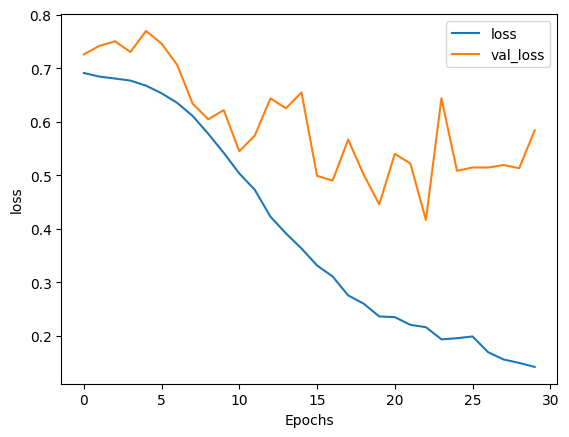

In [94]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [95]:
print(set(training_labels_final))
print(history.history.keys())

{np.int64(0), np.int64(1)}
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Get files for visualing the network

In [96]:
# answer here

e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(5000, 32)


In [97]:
import io

# Create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
# Iterate through the actual word numbers present in the reverse word index
for word_num in reverse_word_index:
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [98]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 5. Predict sentiment with new reviews

In [114]:
# answer here
# Use the model to predict a review
fake_reviews = ['super ganda ng product mo',
                'hindi ganun kaganda pero panget rin',
                'sakto lang']

print(fake_reviews)

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

# Try adding reviews of your own
# Add some negative words (such as "not") to the good reviews and see what happens
# For example:
# they gave us free chocolate cake and did not charge us

['super ganda ng product mo', 'hindi ganun kaganda pero panget rin', 'sakto lang']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
super ganda ng product mo
[0.9621336]


hindi ganun kaganda pero panget rin
[0.11792122]


sakto lang
[0.5646337]


